In [4]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Importing dataset that contains comments from a reddit post about protest to take proactive steps about climate change.
# https://www.reddit.com/r/worldnews/comments/ymwlqu/climate_activists_block_private_jets_at_amsterdam/
# https://www.cbsnews.com/news/climate-activists-block-private-jets-at-amsterdam-airport/
reddit_data = pd.read_csv('climate_activism_comments.csv') 
reddit_data.head()

,Unnamed: 0,comment,ups,downs,created
0,0,Ok thats pretty funny. They rode bicycles arou...,12679,0,1.667673e+09
1,1,"""The environmental group says Schiphol is the ...",2974,0,1.667664e+09
2,2,"Next up, get a bunch of those pedal powered sw...",53,0,1.667683e+09
3,3,"This is the best tl;dr I could make, [original...",389,0,1.667662e+09
4,4,A welcome diversification of climate activism....,446,0,1.667676e+09


# **Data Pre-Processing: Removing Unnecessary Columns**

In [6]:
# View the columns
reddit_data.columns

Index(['Unnamed: 0', 'comment', 'ups', 'downs', 'created'], dtype='object')

In [7]:
# Drop unnecessary column
reddit_data1 = reddit_data.drop(columns = ['Unnamed: 0', 'downs'], axis = 1)
reddit_data1.head()

,comment,ups,created
0,Ok thats pretty funny. They rode bicycles arou...,12679,1.667673e+09
1,"""The environmental group says Schiphol is the ...",2974,1.667664e+09
2,"Next up, get a bunch of those pedal powered sw...",53,1.667683e+09
3,"This is the best tl;dr I could make, [original...",389,1.667662e+09
4,A welcome diversification of climate activism....,446,1.667676e+09


# **Data Pre-Processing: Removal of symbols**

In [8]:
# HERE, WE ARE REMOVING UNNECESSAARY SYMBOLS AND STOPWORDS
# This bunch of code relies heavily on regular expression (re). You can read more about it here: https://docs.python.org/3/library/re.html, https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/ and https://www.tutorialspoint.com/python3/python_reg_expressions.htm

# regular expresion (re) helps to find and replace pattern in a file or string.
# Some of the commonly use ones are: re.match(), re.search(), re.findall(), re.split(), re.sub()


import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

#Reddit text cleaning 
def reddit_clean (redd):
    redd = str(redd).lower()
    redd = re.sub("'", "", redd) 
    redd = re.sub("@[A-Za-z0-9_]+","", redd)
    redd = re.sub("#[A-Za-z0-9_]+","", redd)
    redd = re.sub(r"www.\S+", "", redd)
    redd = re.sub(r"http\S+", "", redd)
    redd = re.sub('[()!?]', ' ', redd)
    redd = re.sub('\[.*?\]',' ', redd)
    redd = re.sub("[^a-z0-9]"," ", redd)
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)
    redd = redd.split()
    stopwords = STOPWORDS
    redd = [w for w in redd if not w in stopwords]
    redd = " ".join(word for word in redd)
    return redd
reddit_data1['comment'] = reddit_data1['comment'].apply(reddit_clean)
reddit_data1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,comment,ups,created
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09
1,environmental group says schiphol largest sour...,2974,1.667664e+09
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09
3,best could make reduced netherlands hundreds c...,389,1.667662e+09
4,welcome diversification climate activism good ...,446,1.667676e+09


In [9]:
# Converting the created date to what we can easily read

from datetime import datetime

reddit_data1['date_time'] = pd.to_datetime(reddit_data1['created'],  unit='s')    # this passes all the time details, including time. # The unit specify what unit our int is is away from the origin
reddit_data1['date'] = reddit_data1['date_time'].dt.strftime('%Y-%m-%d') # Now we have created a formatted string, with only the date

reddit_data1.head()

,comment,ups,created,date_time,date
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09,2022-11-05 18:29:10,2022-11-05
1,environmental group says schiphol largest sour...,2974,1.667664e+09,2022-11-05 16:03:21,2022-11-05
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09,2022-11-05 21:09:14,2022-11-05
3,best could make reduced netherlands hundreds c...,389,1.667662e+09,2022-11-05 15:31:16,2022-11-05
4,welcome diversification climate activism good ...,446,1.667676e+09,2022-11-05 19:14:28,2022-11-05


# **Data Pre-Processing - Tokenization**

In [10]:
# Tokenize the comments
tokenized_reddit_post = reddit_data1['comment'].apply(lambda x: x.split())
print(tokenized_reddit_post)

0       [thats, pretty, funny, rode, bicycles, around,...
1       [environmental, group, says, schiphol, largest...
2       [next, bunch, pedal, powered, swan, boats, blo...
3       [best, could, make, reduced, netherlands, hund...
4       [welcome, diversification, climate, activism, ...
                              ...                        
2407    [clearly, didnt, even, read, opinion, also, yo...
2408                               [really, opened, eyes]
2409    [good, whats, plan, advocacy, find, silly, rig...
2410                                                   []
2411                 [dammit, well, waste, effort, thank]
Name: comment, Length: 2412, dtype: object


# **Data Pre-Processing - Stemming**

In [11]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_reddit_post = tokenized_reddit_post.apply(lambda x: [stemmer.stem(i) for i in x])
reddit_data1['tokenized']= tokenized_reddit_post
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09,2022-11-05 18:29:10,2022-11-05,"[that, pretti, funni, rode, bicycl, around, pl..."
1,environmental group says schiphol largest sour...,2974,1.667664e+09,2022-11-05 16:03:21,2022-11-05,"[environment, group, say, schiphol, largest, s..."
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09,2022-11-05 21:09:14,2022-11-05,"[next, bunch, pedal, power, swan, boat, block,..."
3,best could make reduced netherlands hundreds c...,389,1.667662e+09,2022-11-05 15:31:16,2022-11-05,"[best, could, make, reduc, netherland, hundr, ..."
4,welcome diversification climate activism good ...,446,1.667676e+09,2022-11-05 19:14:28,2022-11-05,"[welcom, diversif, climat, activ, good, mate]"


# **Word Cloud and Word Count**

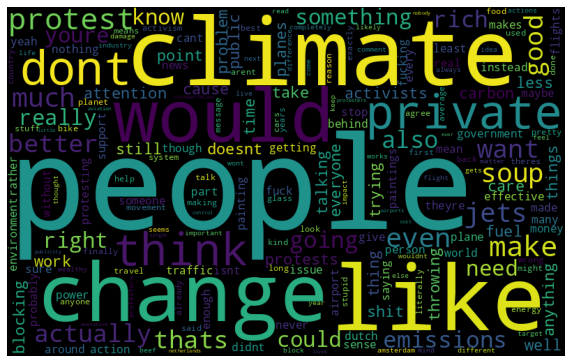

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

all_words = ' '.join([text for text in reddit_data1['comment']])
count_word = collections.Counter(all_words.split())

wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
import itertools
import collections
#count the most words shown up in pos_words
count_word = collections.Counter(all_words.split())
count_word.most_common(15)

[('people', 893),
 ('climate', 403),
 ('like', 375),
 ('change', 339),
 ('would', 277),
 ('private', 273),
 ('dont', 271),
 ('think', 248),
 ('protest', 234),
 ('make', 212),
 ('even', 196),
 ('much', 183),
 ('jets', 180),
 ('soup', 177),
 ('good', 168)]

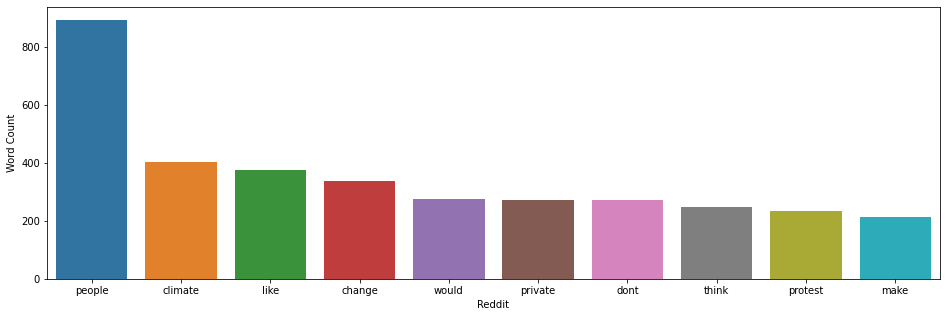

In [14]:
# Make a bar chart of the top 10 neutral words

a = nltk.FreqDist(count_word)
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Reddit", y = "Count")
ax.set(ylabel = 'Word Count')
plt.show()

# **Sentiment Analysis using Textblob**

In [15]:
from textblob import TextBlob     # This is the library we are using for the sentiment analysis.
#The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement 
#and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].
reddit_data1['polarity'] = reddit_data1['comment'].apply(lambda z: TextBlob(z).sentiment.polarity)
reddit_data1['subjectivity'] = reddit_data1['comment'].apply(lambda y: TextBlob(y).sentiment.subjectivity)
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09,2022-11-05 18:29:10,2022-11-05,"[that, pretti, funni, rode, bicycl, around, pl...",0.250000,1.000000
1,environmental group says schiphol largest sour...,2974,1.667664e+09,2022-11-05 16:03:21,2022-11-05,"[environment, group, say, schiphol, largest, s...",0.117187,0.395313
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09,2022-11-05 21:09:14,2022-11-05,"[next, bunch, pedal, power, swan, boat, block,...",0.000000,0.000000
3,best could make reduced netherlands hundreds c...,389,1.667662e+09,2022-11-05 15:31:16,2022-11-05,"[best, could, make, reduc, netherland, hundr, ...",0.200000,0.536111
4,welcome diversification climate activism good ...,446,1.667676e+09,2022-11-05 19:14:28,2022-11-05,"[welcom, diversif, climat, activ, good, mate]",0.750000,0.750000


In [16]:
# Create a function to classify the polarity
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity 
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [17]:
# We create a sentiment column with the function created:
reddit_data1['sentiment'] = reddit_data1['comment'].apply(analyze_sentiment)
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09,2022-11-05 18:29:10,2022-11-05,"[that, pretti, funni, rode, bicycl, around, pl...",0.250000,1.000000,Positive Sentiment
1,environmental group says schiphol largest sour...,2974,1.667664e+09,2022-11-05 16:03:21,2022-11-05,"[environment, group, say, schiphol, largest, s...",0.117187,0.395313,Positive Sentiment
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09,2022-11-05 21:09:14,2022-11-05,"[next, bunch, pedal, power, swan, boat, block,...",0.000000,0.000000,Neutral Sentiment
3,best could make reduced netherlands hundreds c...,389,1.667662e+09,2022-11-05 15:31:16,2022-11-05,"[best, could, make, reduc, netherland, hundr, ...",0.200000,0.536111,Positive Sentiment
4,welcome diversification climate activism good ...,446,1.667676e+09,2022-11-05 19:14:28,2022-11-05,"[welcom, diversif, climat, activ, good, mate]",0.750000,0.750000,Positive Sentiment


In [18]:
# Create a new subjectivity column
reddit_data1['subjectivity2'] = np.where(reddit_data1['subjectivity'] > 0.5, 'Subjective', 'Objective')
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment,subjectivity2
0,thats pretty funny rode bicycles around planes...,12679,1.667673e+09,2022-11-05 18:29:10,2022-11-05,"[that, pretti, funni, rode, bicycl, around, pl...",0.250000,1.000000,Positive Sentiment,Subjective
1,environmental group says schiphol largest sour...,2974,1.667664e+09,2022-11-05 16:03:21,2022-11-05,"[environment, group, say, schiphol, largest, s...",0.117187,0.395313,Positive Sentiment,Objective
2,next bunch pedal powered swan boats block yach...,53,1.667683e+09,2022-11-05 21:09:14,2022-11-05,"[next, bunch, pedal, power, swan, boat, block,...",0.000000,0.000000,Neutral Sentiment,Objective
3,best could make reduced netherlands hundreds c...,389,1.667662e+09,2022-11-05 15:31:16,2022-11-05,"[best, could, make, reduc, netherland, hundr, ...",0.200000,0.536111,Positive Sentiment,Subjective
4,welcome diversification climate activism good ...,446,1.667676e+09,2022-11-05 19:14:28,2022-11-05,"[welcom, diversif, climat, activ, good, mate]",0.750000,0.750000,Positive Sentiment,Subjective


In [19]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1.sentiment.value_counts()

Positive Sentiment    1110
Neutral Sentiment      687
Negative Sentiment     615
Name: sentiment, dtype: int64

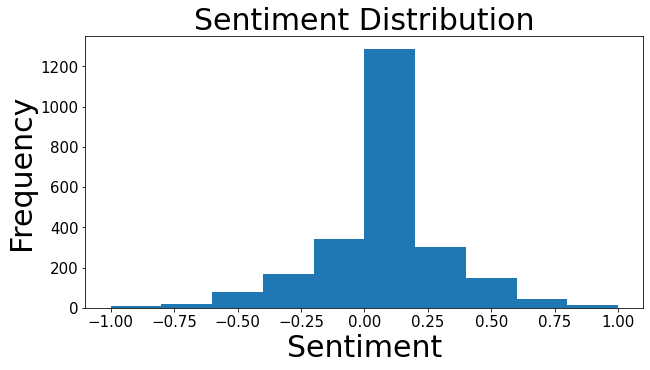

In [20]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['polarity'], bins=10)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

In [21]:
# Counting the number of cases that fall within each subjectivity category
reddit_data1.subjectivity2.value_counts()

Objective     1461
Subjective     951
Name: subjectivity2, dtype: int64

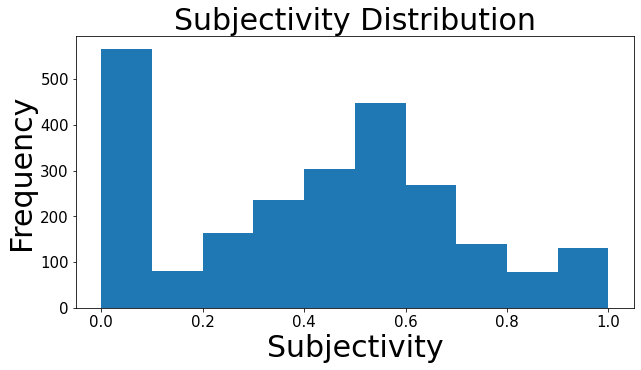

In [22]:
# Bar chart of the subjectivity
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['subjectivity'], bins=10)
plt.title('Subjectivity Distribution', fontsize=30)
plt.show()

In [23]:
# Summary Statistics of polarity and subjectivity
pol_sub = reddit_data1[["polarity", "subjectivity"]]
pol_sub.describe()                    # Even though there are more positive sentiment sentences, overall the average polarity is around 0.06

,polarity,subjectivity
count,2412.000000,2412.000000
mean,0.057251,0.408039
std,0.252524,0.287812
min,-1.000000,0.000000
25%,-0.005966,0.125000
50%,0.000000,0.450000
75%,0.187500,0.600000
max,1.000000,1.000000


In [24]:
# Crosstabs
pd.crosstab(reddit_data1['sentiment'], reddit_data1['subjectivity2'])

subjectivity2,Objective,Subjective
sentiment,,
Negative Sentiment,252,363
Neutral Sentiment,650,37
Positive Sentiment,559,551


# HANDS-ON SESSION 6

1. Make a word cloud from comments with "neutral sentiment". In addition, make a bar chart of the top 15 words in this word cloud. 

In [25]:
#import the necessary python libraries 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

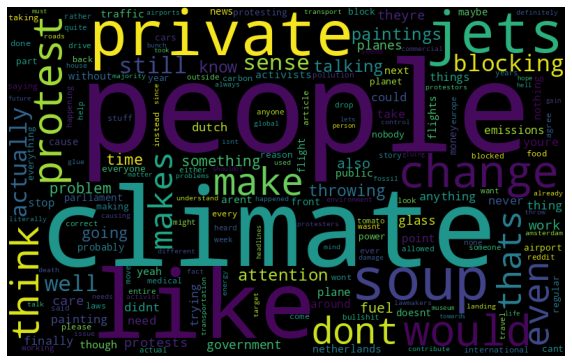

In [45]:
#generate word cloud 
neutral_comments = reddit_data1.loc[reddit_data1["sentiment"] == "Neutral Sentiment", "comment"].tolist()
neutral_words = ' '.join([text for text in neutral_comments])
count_word = collections.Counter(neutral_words.split())
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

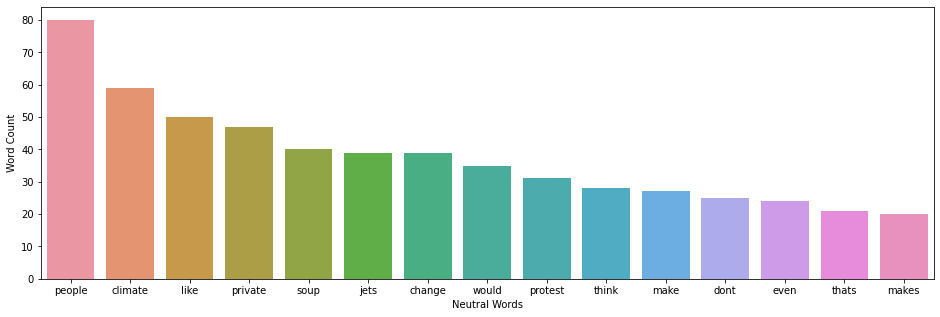

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
# Make a bar chart of the top 15 neutral words

# Filter the comments to only include those with neutral sentiment
neutral_comments = reddit_data1.loc[reddit_data1["sentiment"] == "Neutral Sentiment", "comment"].tolist()

# Combine all the words into a single string and count their occurrences
all_words = ' '.join([text for text in neutral_comments])
count_word = collections.Counter(all_words.split())

# Make a bar chart of the top 15 neutral words
a = nltk.FreqDist(count_word)
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns="Count", n=15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Reddit", y="Count")
ax.set(ylabel='Word Count')
ax.set(xlabel='Neutral Words')
plt.show()


2. Make a word cloud from the comments with "positive sentiment". In addition, make a bar chart of the top 15 words in this word cloud. 

In [39]:
#import the necessary python libraries 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

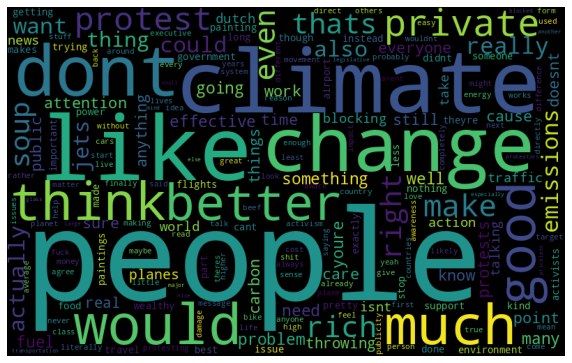

In [46]:
#generate word cloud 
# Combine all the words into a single string and count their occurrences
positive_comments = reddit_data1.loc[reddit_data1["sentiment"] == "Positive Sentiment", "comment"].tolist()
positive_words = ' '.join([text for text in positive_comments])
count_word = collections.Counter(positive_words.split())
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

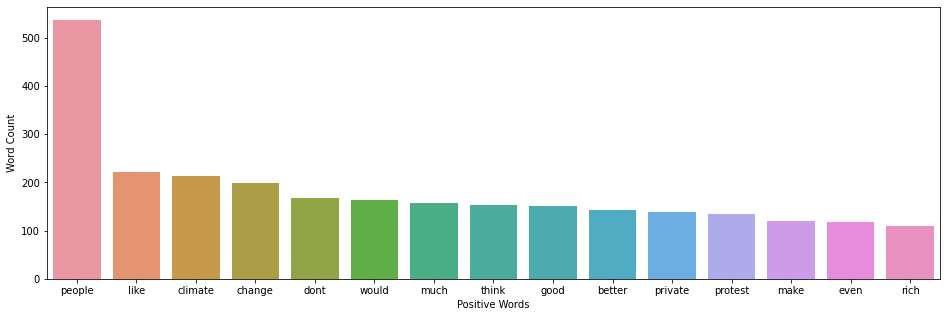

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
# Make a bar chart of the top 15 neutral words

# Filter the comments to only include those with neutral sentiment
positive_comments = reddit_data1.loc[reddit_data1["sentiment"] == "Positive Sentiment", "comment"].tolist()

# Combine all the words into a single string and count their occurrences
all_words = ' '.join([text for text in positive_comments])
count_word = collections.Counter(all_words.split())

# Make a bar chart of the top 15 neutral words
a = nltk.FreqDist(count_word)
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns="Count", n=15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Reddit", y="Count")
ax.set(ylabel='Word Count')
ax.set(xlabel='Positive Words')
plt.show()